---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 3 (Evaluation)

## Evaluation for Classification

### Learning Objectives
#### Understand why accuracy only gives a partial picture of a classifier's performance.
#### Understand the motivation and definition of important evaluation metrics in machine learning.
#### Learn how to use a variety of evaluation metrics to evaluate supervised machine learning models.
#### Learn about choosing the right metric for selecting between models or for doing parameter tuning.

### Represent / Train / Evaluate / Refine Cycle
Representation: Extract and select object features.

Train Models: Fit the estimator to the data.

Evaluation: tells which data instances are being classified or predicted incorrectly, indicates better features or different kernel function.

Feature and model refinement.

#### Note the Difference of the metrics used in Training Phase and the Evaluation Phase.
e.g., The objective function that is optimized during the training phase maybe a different surrogate metric. That is easier to use in practice for optimization purposes than what is used for the evaluation metric.

For example: Google search engine use the ranking algorithm to measure the seach engine's performance in the training phase, but there are other evaluation methods to measure aspects of that seach engine's performance using the ranking algorithm. The evaluation metrics can be: How many unique users the systen sees per day.

### Evaluation
#### Different applications have very different goals.
#### Accuracy is widely used, but many others are possible. Such as:
---- User Satisfaction (Web Search)

---- Amount of revenue (e-commerce)

----Increase in patient survival rates (medical).

#### It is very important to choose evaluation methods that match the goal of your application.
#### Compute your selected evaluation metric for multiple different models.
#### Then select the model with 'best' value of evaluation metric.

### Accuracy with Imbalanced Classes
#### Suppose you have two classes:
---- Relevant (R): The positive class

---- Not_Relevant (N): the negative class
#### Out of 1000 randomly selected items, on average
---- One item is relevant and has an R label.

---- The rest of the items (999 of them) ARE NOT RELEVANT AND LABELLED n.
#### Recall that:
     Accuracy =  # corrected predictions / # total instances
#### You build a classifier to predict relevant items, and see that its accuracy on a test set is 99%.
#### Wow! Amazingly good, right?
#### For comparison, suppose we had a 'dummy' classifier that did not look at the features at all, and always just blindly predicted the most frequent class (i.e. the negative N class).
### Assuming a test set of 1000 instances, what would this dummy classifier's accuracy be?
#### Answer: Accuracy(DUMMY) = 999 / 1000 = 99.9%

### Preamble

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target
print(pd.Series(dataset.target).unique())
print(dataset.target_names)
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)
## np.bincount() uses as Count number of occurrences of each value in array of non-negative ints

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9088888888888889

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [8]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

### Dummy Classifiers Completely Ignore the Input Data!
#### Dummy classifiers serve as a sanity check on your classfier's performance.
#### They provide a null metric (e.g. null accuracy) baseline.
#### Dummy classifiers should not be used for real problems.

#### Some commonly-used settings for the strategy = parameter for DummyClassifier in scikit-learn:
---- most_frequent : predicts the most frequent label in the training set.

---- stratified: random predictions based on training set class distribution.

---- uniform: generates predictions uniformly at random. All classes have an equal chance at being output instead of being weighted by their frequency in the training set.

---- constant: always predicts a constant label provided by the user.
     A major motivation of this method is F1 -scoring, when the positive class is in the minority.

### What if my classifier accuracy is close to the null accuracy baseline?
#### This could be a sign of:
   #### 1. Ineffective, erroneous or missing features.
   #### 2. Poor choice of kernel or hyperparameter.
   #### 3. Large class imbalance.

In [38]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Dummy Regressors (Counterpart of DummyClassifier)
#### strategy parameter options:
---- 1. mean: predicts the mean of the training targets.

---- 2. median: predicts the median of the training targets.

---- 3. quantile: predicts a user-provided quantile of the training targets.

---- 4. constant: predicts a constant user_provided value.

### Confusion matrices

#### Binary (two-class) confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)
## First Column: From top to bottom is 'True Negative', 'False Negative'
## Second Column: From top to bottom is 'False Positive', 'True Positive'
## This is called Confusion Matrix

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [40]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[368  39]
 [ 36   7]]


C:\Anaconda3\lib\site-packages\sklearn\dummy.py:220: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  k in range(self.n_outputs_)).T


In [41]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Confusion matrix for binary prediction task
Note: Always look at the confusion matrix for your classifier

### Evaluation metrics for binary classification

#### Accuracy: for what fraction of all instances is the classifier's prediction correct (for either positive or negative class) ?
Accuracy = (TN + TP) / (TN + TP + FN + FP)
#### Classification Error ( 1 - Accuracy): for what fraction of all instances is the classifier's prediction incorrect?
ClassificationError =  (FP + FN) / (FP + FN + TP +TN)
#### Recall, or True Positive Rate (TPR): what fraction of all positive instances does classifier correctly identify as positive?
Recall = TP / (TP + FN)

Recall is also known as: True Positive Rate (TPR), Sensitivity, Probability of detection.
#### Precision: what fraction of positive predictions are correct?
Precision = TP / (TP + FP)
#### False Positive Rate (FPR): What fraction of all negative instances does the classifier incorrectly identify as positive?
FPR = FP / (TN + FP)    False Positive Rate is also known as: Specificity 
#### Trade Off: Higher Precision, Lower Recall v.v. Lower Precision, Higher Recall

### There is often a tradeoff between precision and recall
#### Recall-oriented machine learning tasks:
---- 1. Search and information extraction in legal discovery.

---- 2. Tumor detection. (Want less false negative, need higher recall).

---- 3. Often paired with a human expert to filter out false positives.
#### Precision-oriented machine learning tasks:
---- 1. Seach engine ranking, query suggestion.

---- 2. Document classification: email spam. need less false positive, thus higher precision

---- 3. Many customer-facing tasks (users remember failures!)

### F1 - Score: combining precision & recall into a single number
F1 = 2 * ( Precision * Recall) / (Precision + Recall ) = 2 * TP /( 2*TP + FN + FP)

Fbeta= = (1+$\beta^2$)*Precision*Recall/[($\beta^2$*Precision) + Recall ] =(1+$\beta^2$)*TP/[(1+$\beta^2$)*TP + $\beta$*FN +FP]

$\beta$ allows adjustment of metric to control the emphasis on recall vs precision:
#### Precision-oriented users: $\beta$=0.5 (false positives hurt performance more than false negatives)
#### Recall-oriented users: $\beta$=2 (false negatives hurt performance more than false positives.
#### $\beta$ = 1 that weights precision and recall equally.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [23]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))
## First row is 0 and second row is 1, the support column shows the number of instances in the test set (true label)

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [29]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.91      0.89      0.90       407
          1       0.10      0.12      0.11        43

avg / total       0.83      0.82      0.82       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions (decision_function)

#### Each classifier score value per test point indicates how confidently the classifier predicts the positive class (large-magnitude positive values) or the negative class (large-magnitude negative values).
#### Choosing a fixed decision threshold gives a classification rule.
#### By sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)  ## lr is previous Logistic Regression
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.72250047336062),
 (0, -18.907578437722535),
 (0, -19.736034587372785),
 (0, -9.749345951179265),
 (1, 5.23490021249531),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826754),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251942),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

### Predicted Probability of Class Membership (predict_proba)
#### Typical rule: choose most likely class
---- e.g class 1 if thrshold > 0.50
#### Adjusting threshold affects predictions of classifier.
#### Higher threshold results in a more conservative classifier.
---- e.g. only predict Class 1 if estimated probability of class 1 is above 70%.

---- This increases precision. Does not predict class 1 as often, but when it does, it gets high proportion of class 1 instances correct.
#### Not all models provide realistic probability estimates.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.60108727067405e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.6837934145133596e-09),
 (0, 5.832940124078156e-05),
 (1, 0.9947008742687163),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.246509304835812e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.56980024484208e-10),
 (0, 1.992053353707062e-05),
 (0, 6.706507243234968e-06),
 (0, 1.70461945380572e-05),
 (1, 0.9999864056960567),
 (0, 9.853591296551983e-13),
 (0, 2.600937459498366e-06),
 (0, 5.944289259618554e-12)]

### Varying the Decision Threshold
Look at how classifier performs for all possible decision thresholds: which is the precision and recall rate for different decision functions

### Precision-recall curves

X-axis: Precision
    
Y-axis: Recall
    
Top right corner: 1. The 'ideal' point, 2. Precision = 1.0, 3. Recall = 1.0

'Steepness' of P-R curves is important: 1. Maximize precision, 2. which maximizing recall

[ 4.04845925  3.93693091  3.48713385  3.44766895  3.34250868  2.57416279
  2.37659283  2.3483053   2.3011841   2.15851971  2.03762593  1.87206111
  1.75285726  1.72765067  1.685346    1.4815478   1.3402485   1.30314117
  1.08163943  0.5667415   0.13091544  0.17442494  0.47530458  0.63948636
  1.00485768  1.33634388  1.68346682  1.69795171  1.87960146  2.19100044
  2.43488297  2.55290065  3.72065925  3.80695952  4.21241943  4.25107582
  4.30627701  4.31494258  4.55488541  4.57009841  4.93296269  5.23490021
  5.73358178  6.12932613  6.55464725  6.87013568  6.93007061  7.21929417
  7.37400079  7.81041273  8.26287048  8.39735001  8.45767939  9.84746047
  9.87271261 10.2008926  11.20584609 11.48218292 11.55008778 11.68125931
 13.25923101 14.73793875 16.02850745]


<IPython.core.display.Javascript object>


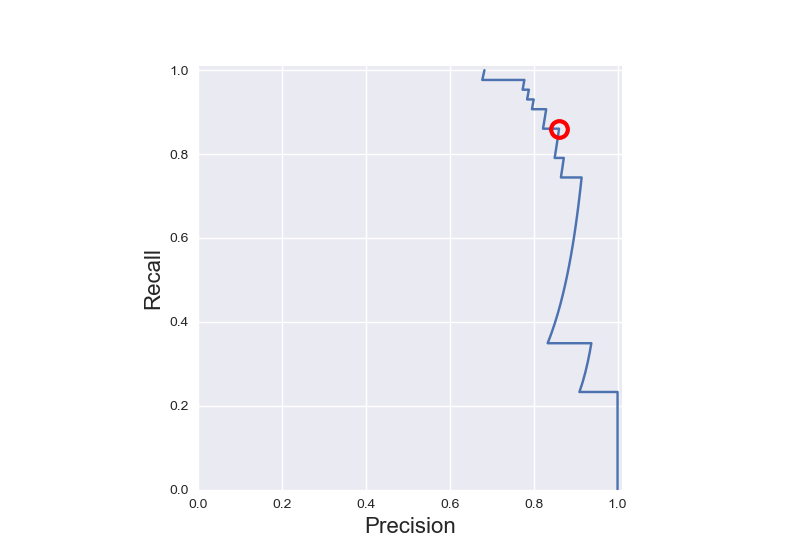

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [52]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)

closest_zero = np.argmin(np.abs(thresholds))
## np.argmin() returns the indices of the minimum values along an axis.
print(np.abs(thresholds))  ## the number in the index position 20 is the smallest
closest_zero_p = precision[closest_zero]  ## precision rate in the index position 20
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
## The red circle means the precision and recall this classifier achieves when threshold (decision function) is 0(close to 0)

### ROC curves, Area-Under-Curve (AUC)

### ROC Curve
X-axis: False Positive Rate

Y_axis: True Positive Rate (Recall)

Top left corner: 1. The 'ideal' point. 2. False positive rate of zero and True positive rate of one.

'Steepness' of ROC curves is important: 1. Maximize the true positive rate. 2. While minimizing the false positive rate.

<IPython.core.display.Javascript object>


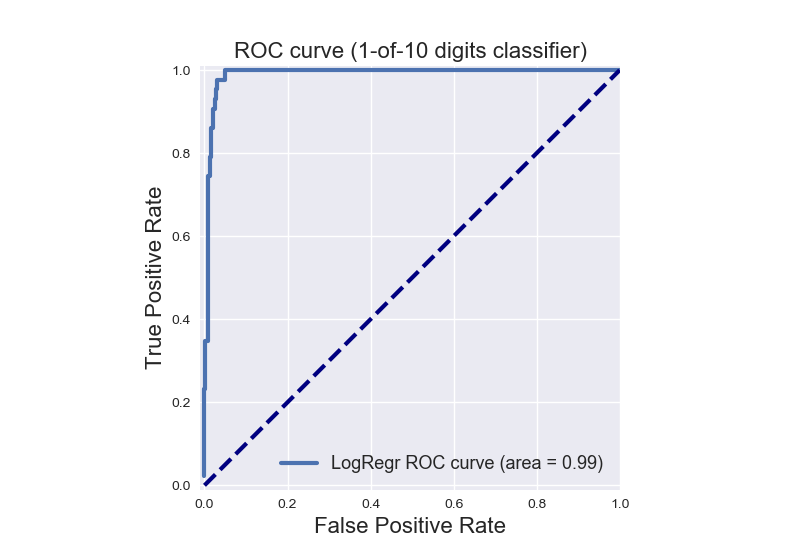

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [14]:
## ROC curve: Receiver Operating Characteristic Curve

from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
## The dotted line is the results from a classifier that randomly guesses the label for a binary class.
## The dotted line is used as a baseline

<IPython.core.display.Javascript object>


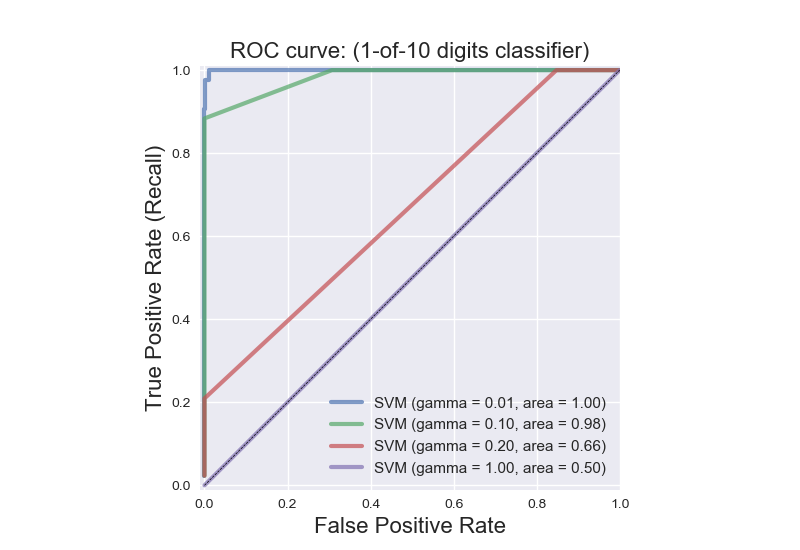

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [16]:
##  Calculate the area under the ROC curve
## The single number that measure the total area underneath the ROC curve as a way to summarize a classifier's performance

from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

### Multi-Class Evaluation
#### Multi-Class evaluation is an extension of the binary case.
---- A collection of true vs. predicted binary outcomes, one per class.

---- Confusion matrices are especially useful.

---- Classification report.
#### Overall evaluation metrics are averages across all classes.
---- But there are different ways to average multi-class results: we will cover these shortly.

----The support(number of instances) for each class is important to consider.

e.g. in case of imbalanced classes

#### Multi-label classification(web pages topics): each instance can have multiple labels (not covered here).

<IPython.core.display.Javascript object>


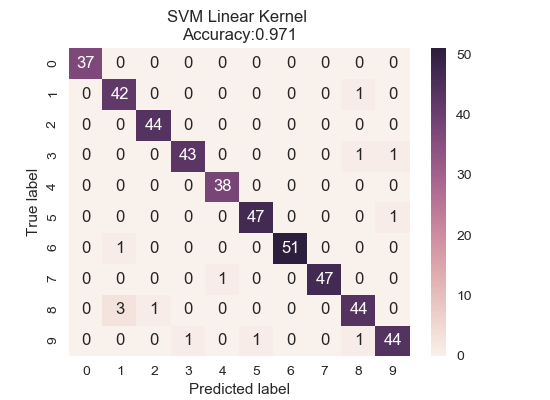

<IPython.core.display.Javascript object>


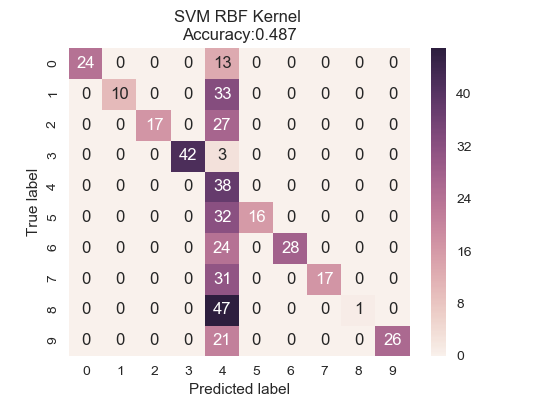

In [21]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix( y_test_mc, svm_predicted_mc)  
## for other metrics, such as confusion metrics, we can not change order, true first and then predict
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(
                                                                    svm_predicted_mc, y_test_mc)))
## for accuracy_score() we can change the input order, that does not matter
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [24]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



#### Micro- vs. macro-averaged metrics

### Micro vs. Macro Average

#### Macro-Average: Each class has equal weight.
---- 1. Compute metric within each class.

---- 2. Average resulting metrics across classes.

#### Micro-Average: Each instance has equal weight, Largest classes have most influence
---- 1. Aggregate outcomes across all classes. (predicted correct)

---- 2. Compute metric with aggregate outcomes. (predicted correct / total number).

Usually, the micro-average will be the same for different metrics

In [25]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))
## The micro average precision is smaller is because influenced much more by the wrong predicted values.

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In [26]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


### Macro-Average vs Micro-Average
#### If the classes have about the same number of isntances, macro-average and micro-average will be about the same.
#### If some classes are much larger (more instances) than others, and you want to:
---- Weight your metric toward the largest class, use micro-averaging.

---- Weight your metric toward the smallest class, use macro-averaging.
#### If the micro-average is much lower than the macro-average then examine the larger classes for poor metric performance.
#### If the macro-average is much lower than the micro-average then examine the smaller classes for poor metric performance.

### Regression evaluation metrics

#### Typically r2_score is enough
---- 1. Reminder: computes how well future instances will be predicted.

---- 2. Best possible socre is 1.0

---- 3. Constant prediction score is 0.0

---- 4. r^2 usually greater than 0 unless really bad model fitting non-linear functions to data.

#### Alternative metrics include:
---- 1. mean_absolute_error (mean absolute difference of target & predicted values). -> L1 Norm Loss

---- 2. mean_squared_error (squared difference of target & predicted values). -> L2 Norm Loss

---- 3. median_absolute_error (robust to outliers). -> Used when we want to ignore the outlier which has large impact on other two metrics or r^2.

(442, 1)
Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


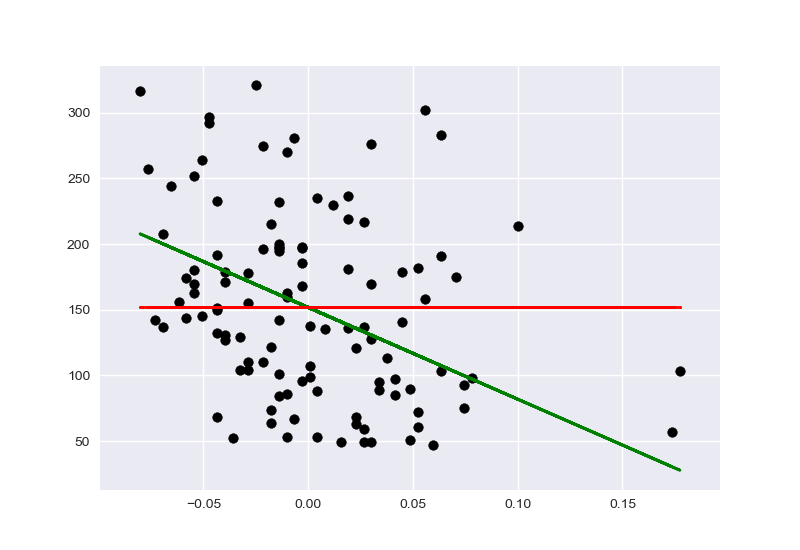

In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]  ## Extract the 7th column in the database
y = diabetes.target
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

### Dummy Regressors
#### As in classification, comparison to a 'dummy' prediction model that uses a fixed rule can be useful
#### For the same reason, scikit.learn provides dummy regressors.


### Dummy Regressors' strategy
### The DummyRegressor class implements four simple baseline rules for regression, using the strategy parameter:
#### mean: predicts the mean of the training target valyes.
#### median: predicts the median of the training target values.
#### quantile: predicts a user-provided quantile of the training target valyes (e.g. value at the 75th percentile)
#### constant: predicts a custom constant valye provided by r=the user.

### Model selection using evaluation metrics

#### Train/test on same data
---- 1. Single metric.

---- 2. Typically overfits and likely won't generalize well to new data.

---- 3. But can serve as a sanity check: low accuracy on the training set may indicate an implementation problem.

#### Single train/test split
---- 1. Single metric.

---- 2. Speed and simplicity.

---- 3. Lack of variance information.This does not give realistic estimates for how well the model may work on future new data.

#### K-fold cross-validation
---- 1. K train-test splits.

---- 2. Average metric over all splits (default: accuracy)

---- 3. Can be combined with parameter grid search: GridSearchCV (default. cv = 3)
Use the GridSearchCV method in each fold to find optimal parameters for a model wrt the evaluation metric.



#### Cross-validation example

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
print(y)
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

[False  True False ... False False False]
Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

## use the GridSearchCV to find the value of gamma that optimizes a given avaluation metric in two cases
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)
## The evaluation metrics used to optimize might lead to different best parameter

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


#### Evaluation metrics supported for model selection

In [43]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics
How a classifier's decision boundary changes what it is optimized for different evaluation metrics.

<IPython.core.display.Javascript object>


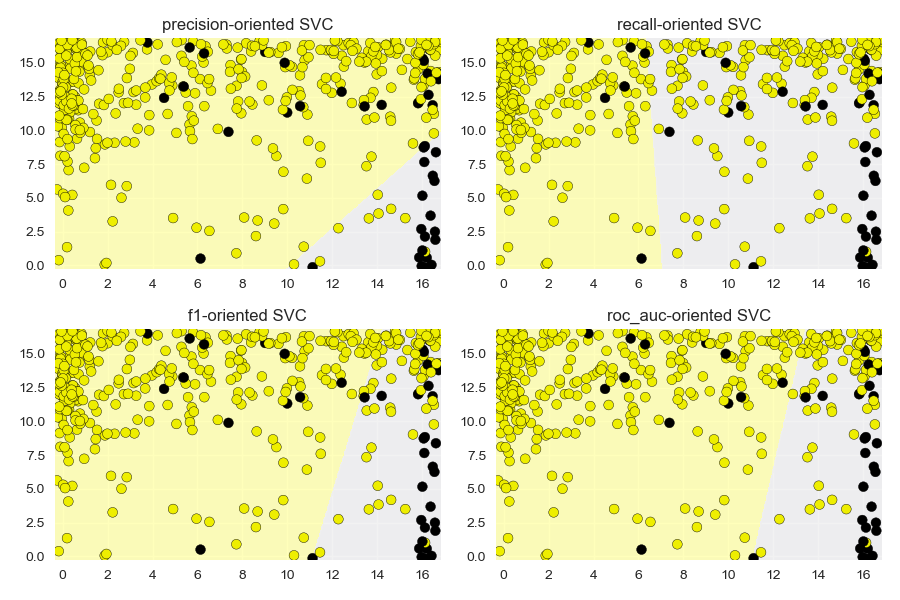

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5424047250327874
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9284310837047003
Grid best parameter (max. f1): {'class_weight': {1: 4}}
Grid best score (f1): 0.5100679605231854
Grid best parameter (max. roc_auc): {'class_weight': {1: 5}}
Grid best score (roc_auc): 0.8926730005078207


In [44]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
## The optional class weight parameter is how much weight is given to each of the two classes during training
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()
## It turns out that optimizing for different evaluation metrics results in different optimal values of the class weight parameter


#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


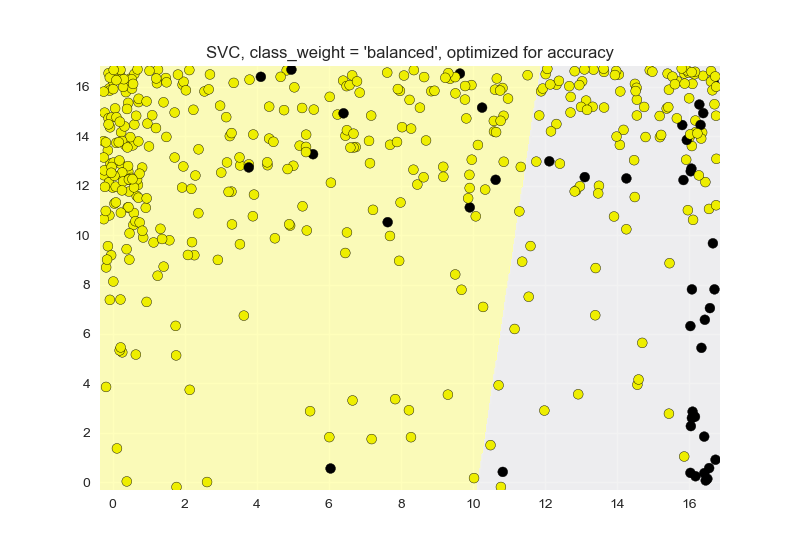

<IPython.core.display.Javascript object>


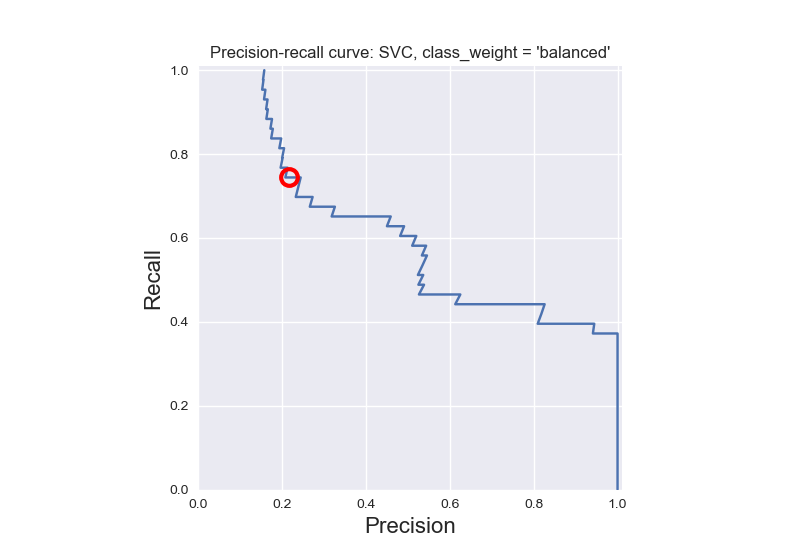

At zero threshold, precision: 0.22, recall: 0.74


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

### Training, Validation , and Test Framework for Model Selection and Evaluation
#### Using only cross-validation or a test set to do model selection may lead to more subtle overfitting / optimistic generalization estimates. (data leakage, the test set of cross validation will play as evalution and selecting model roles)
#### Instead, use three data splits:
---- 1. Training set (model building)

---- 2. Validation set(model selection)

---- 3. Test set (final evaluation)
#### In practice steps:
---- 1. Create an initial training/test split.

---- 2. Do cross-validation on the training data for model/parameter selection.

---- 3. Save the held-out test set for final model evaluation.

### Concluding Notes
#### Accuracy is often not the right evaluation metric for many real-world machine learning tasks.
---- False positives and false negatives may need to be treated very fdifferently according to business need.

---- Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals.

#### Example of additional evaluation methods include:
---- Learning curve: How much does accuracy (or other metric) change as a function of the amount of training data.
Learning curves may be useful as part of a cost-benefit analysis, estimate the likely performance improvemment of your classifier.

---- Sensitivity Analysis: How much does accuracy (or other evaluation metric) change as a function of key learning parameter values? This assess how robust the model is to choice of parameters. eg. decision tree depth, future value threshold.